Train shape: (42000, 785)
Test shape: (28000, 784)


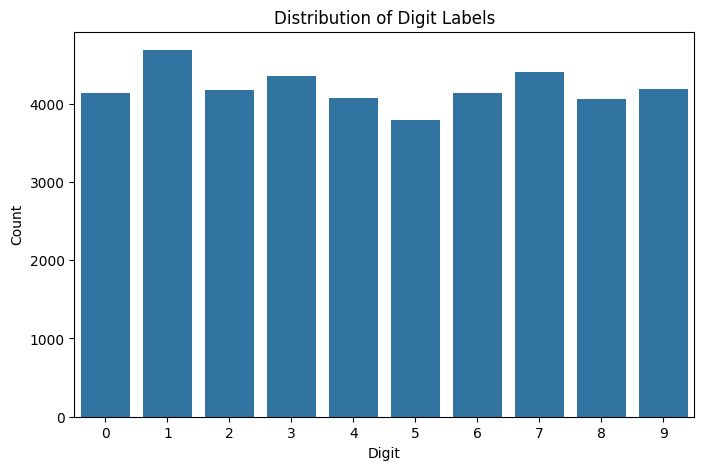

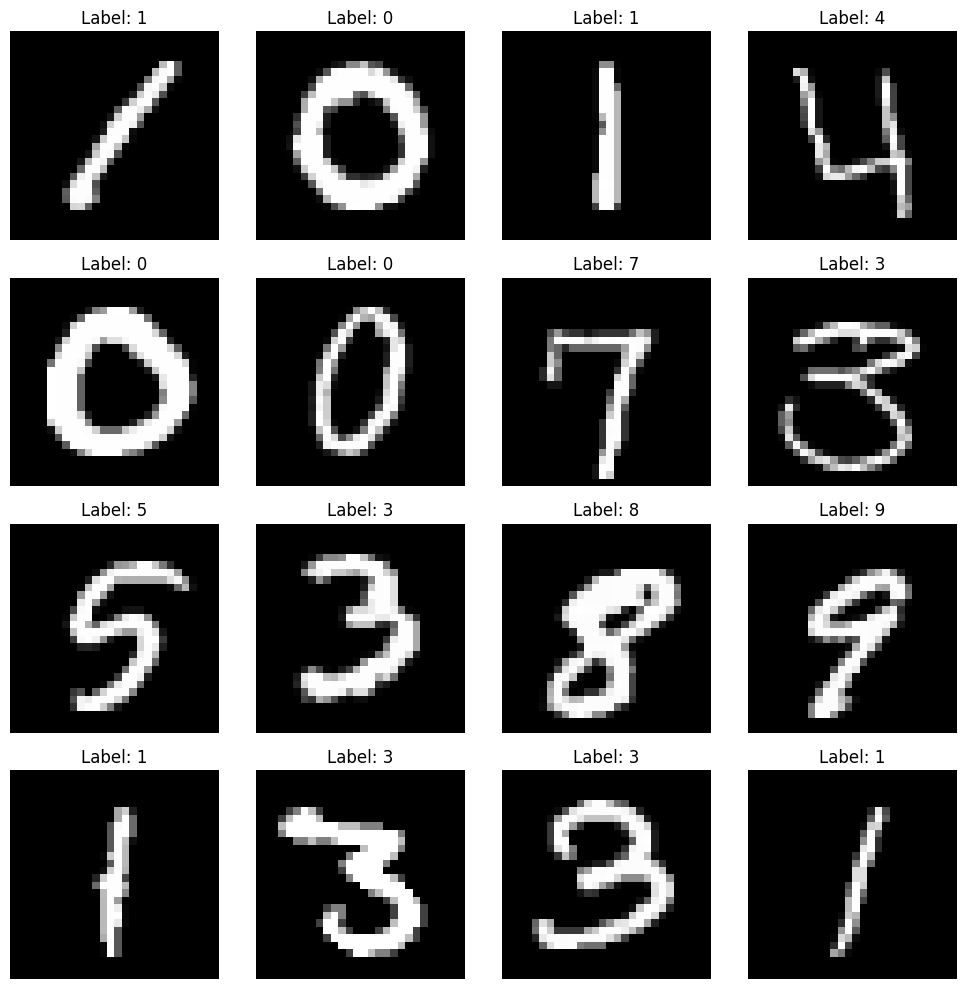

X shape: (42000, 784)
y shape: (42000,)
X_test shape: (28000, 784)
Reshaped X: (42000, 28, 28, 1)
Reshaped Test: (28000, 28, 28, 1)
One-hot encoded y shape: (42000, 10)
Training data: (37800, 28, 28, 1)
Validation data: (4200, 28, 28, 1)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 44s 146ms/step - accuracy: 0.7968 - loss: 0.6539 - val_accuracy: 0.9767 - val_loss: 0.0786
Epoch 2/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 49s 167ms/step - accuracy: 0.9718 - loss: 0.0894 - val_accuracy: 0.9798 - val_loss: 0.0611
Epoch 3/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 75s 145ms/step - accuracy: 0.9806 - loss: 0.0599 - val_accuracy: 0.9862 - val_loss: 0.0448
Epoch 4/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 83s 149ms/step - accuracy: 0.9858 - loss: 0.0451 - val_accuracy: 0.9857 - val_loss: 0.0460
Epoch 5/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 80s 143ms/step - accuracy: 0.9891 - loss: 0.0337 - val_accuracy: 0.9881 - val_loss: 0.0411
Epoch 6/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 84s 149ms/step - accuracy: 0.9904 - loss: 0.0305 - val_accuracy: 0.9895 - val_loss: 0.0372
Epoch 7/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 43s 144ms/step - accuracy: 0.9920 - loss: 0.0241 - val_accuracy: 0.9902 - val_loss: 0.0391
Epoch 8/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 87s 163ms/step - accuracy: 0.9931 - loss: 0

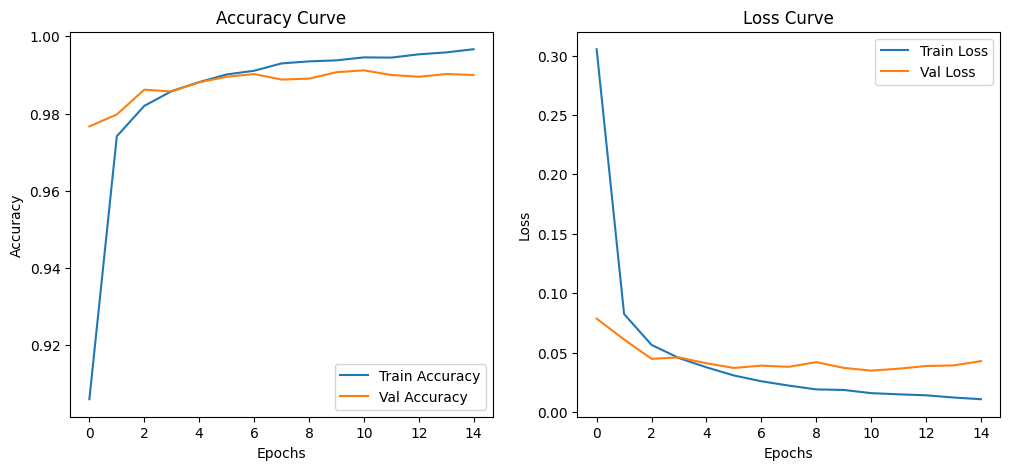

Final Validation Accuracy: 0.9900000095367432
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
Number of incorrect predictions: 42


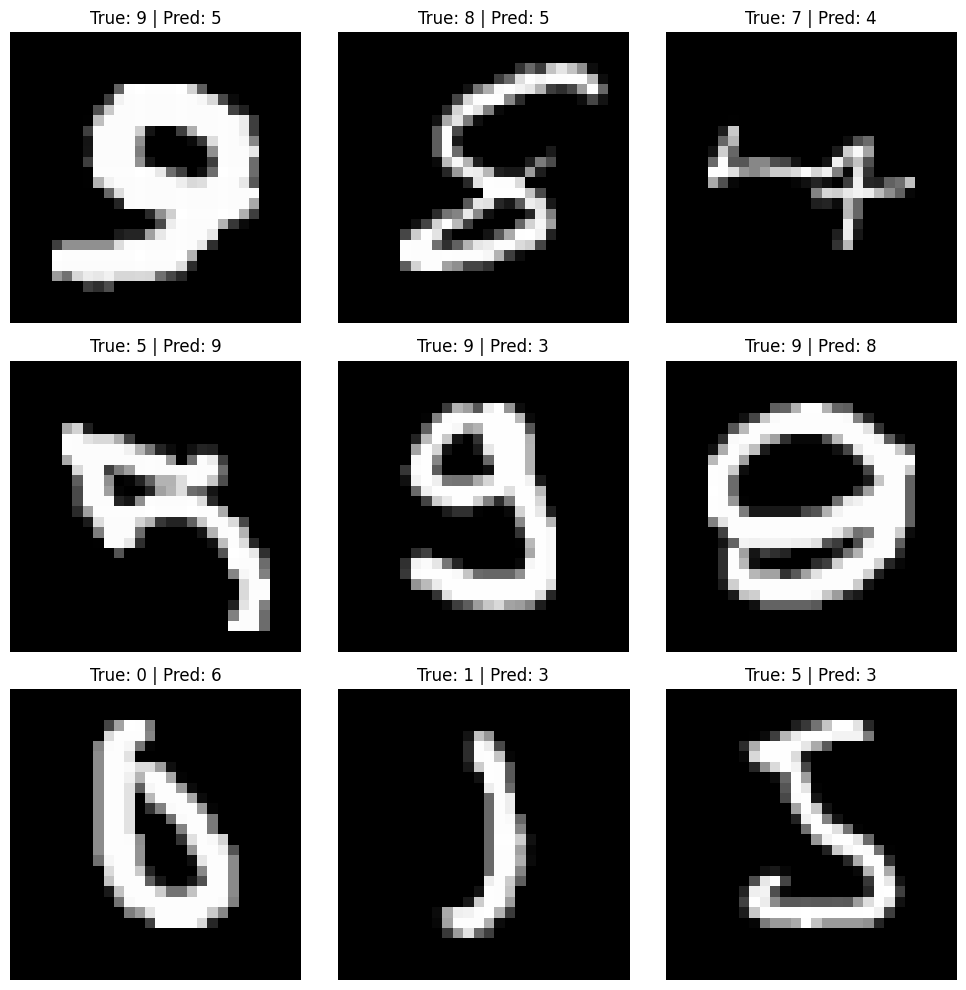

875/875 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step
submission.csv saved successfully!


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")


train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)


plt.figure(figsize=(8,5))
sns.countplot(x=train["label"])
plt.title("Distribution of Digit Labels")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    image = train.iloc[i, 1:].values.reshape(28, 28)
    plt.imshow(image, cmap="gray")
    plt.title(f"Label: {train.iloc[i, 0]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


X = train.drop("label", axis=1).values
y = train["label"].values
X_test = test.values

print("X shape:", X.shape)
print("y shape:", y.shape)
print("X_test shape:", X_test.shape)



X = X.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0


X = X.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Reshaped X:", X.shape)
print("Reshaped Test:", X_test.shape)



y = to_categorical(y, num_classes=10)
print("One-hot encoded y shape:", y.shape)



X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, random_state=42
)

print("Training data:", X_train.shape)
print("Validation data:", X_val.shape)


model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu", padding="same"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(10, activation="softmax")
])

model.summary()



model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)



history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=128,
    validation_data=(X_val, y_val),
    verbose=1
)



plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

plt.show()



val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print("Final Validation Accuracy:", val_acc)


y_val_pred = np.argmax(model.predict(X_val), axis=1)
y_val_true = np.argmax(y_val, axis=1)

wrong_indices = np.where(y_val_pred != y_val_true)[0]
print("Number of incorrect predictions:", len(wrong_indices))

plt.figure(figsize=(10,10))
for i, idx in enumerate(wrong_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_val[idx].reshape(28,28), cmap="gray")
    plt.title(f"True: {y_val_true[idx]} | Pred: {y_val_pred[idx]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


test_predictions = np.argmax(model.predict(X_test), axis=1)

submission = pd.DataFrame({
    "ImageId": np.arange(1, len(test_predictions) + 1),
    "Label": test_predictions
})

submission.to_csv("submission.csv", index=False)
print("submission.csv saved successfully!")
